# Streamflow analysis

### Rainey Aberle

### September 2022

In [1]:
# Install bmi_nwis if it doesn't exist
# !pip install bmi_nwis

In [2]:
import dataretrieval.nwis as nwis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data from the USGS stream gauge site(s) and plot annual max streamflow 

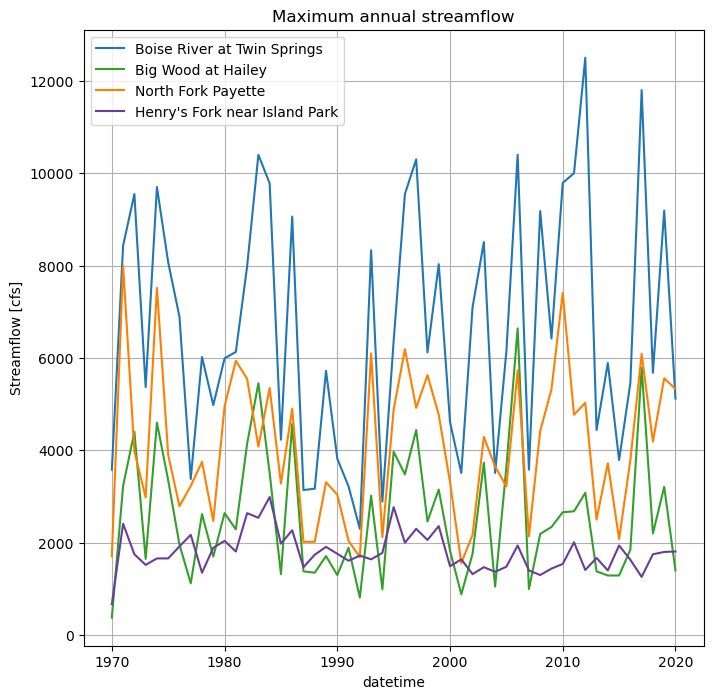

In [3]:
# define site names and site ID numbers
site_names = ["Boise River at Twin Springs", 
              "Big Wood at Hailey", 
              "North Fork Payette", 
              "Henry's Fork near Island Park"]
site_ids = ['13185000', '13139510', '13246000', '13042500']

# define start and end dates
start_date = '1970-10-01'
end_date = '2020-09-30'

# define colors for plotting
colors = ['#1f78b4', '#33a02c', '#ff7f00', '#6a3d9a']

# set up figure
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.set_ylabel('Streamflow [cfs]')

# initialize list of datasets
dfs = [None]*len(site_names)
i=0 # loop counter

# loop through sites
for site_id, site_name, color in list(zip(site_ids, site_names, colors)):
    
    # Load data from USGS stream gauge site
    dfs[i] = nwis.get_record(sites=site_id, service='dv', 
                             start=start_date, end=end_date)
    
    # grab the annual maximum streamflow
    df_yr = dfs[i]['00060_Mean'].groupby(dfs[i].index.year).max()
    
    # plot
    df_yr.plot(label=site_name, color=color)

    i+=1 # increase loop counter
    
ax.legend()
ax.grid()
ax.set_title('Maximum annual streamflow')
plt.show()

## Flood Frequency Analysis

figure saved to file


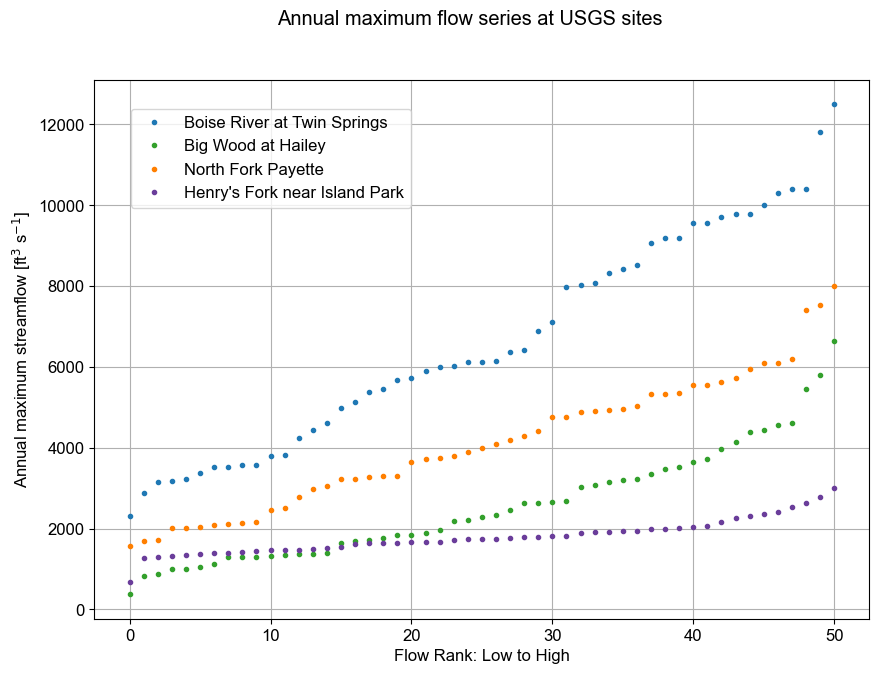

In [5]:
# set up figure
fig, ax = plt.subplots(1,1,figsize=(10,7))
plt.rcParams.update({'font.size':12, 'font.sans-serif':'Arial'})
ax.set_xlabel('Flow Rank: Low to High')
ax.set_ylabel('Annual maximum streamflow [ft$^{3}$ s$^{-1}$]')

# loop through sites
for df, site_name, color in list(zip(dfs, site_names, colors)):

    # Get raw values of annual maximum flow
    q_ams = df['00060_Mean'].groupby(df.index.year).max().values
    q_ams_sorted = np.sort(q_ams)
    
    # plot
    ax.plot(q_ams_sorted, '.', markersize=6, color=color, 
            label=site_name)

fig.legend(bbox_to_anchor=(0.45, 0.85))
# fig.tight_layout()
fig.suptitle('Annual maximum flow series at USGS sites')
ax.grid()

# save figure
fig.savefig('../figures/annual_max_flow.png', dpi=200)
print('figure saved to file')